In [85]:
import numpy as np
from scipy.stats import multivariate_normal
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples


In [86]:
# class GMM:
#     def __init__(self, n_components, iterations=100, threshold=0.004, min_covar=5e-9):
#         self.n_components = n_components
#         self.means_ = None
#         self.covariances_ = None
#         self.prior_ = None
#         self.wij = None
#         self.iterations = iterations
#         self.threshold = threshold
#         self.converged = False
#         self.log_likelihood_trace = []
#         self.min_covar = min_covar

#     def initialize_parameters(self, data):
#         n_samples, n_features = data.shape
#         np.random.seed(42)
#         self.wij = np.zeros((n_samples, self.n_components))
#         chosen = np.random.choice(n_samples, self.n_components, replace=False)
#         self.means_ = data[chosen]
#         self.prior_ = np.full(self.n_components, 1 / self.n_components)
#         self.covariances_ = np.tile(np.identity(n_features), (self.n_components, 1, 1))
#         return self.means_, self.covariances_, self.prior_

#     def fit(self, data):
#         means_, covariances_, prior_ = self.initialize_parameters(data)
#         log_likelihood = 0
#         for _ in range(self.iterations):
#             new_log_likelihood = self.expectation_step(data)
#             self.maximization_step(data)
#             if abs(new_log_likelihood - log_likelihood) <= self.threshold:
#                 self.converged = True
#                 break
#             log_likelihood = new_log_likelihood
#             self.log_likelihood_trace.append(log_likelihood)
#         return means_, covariances_, prior_

#     def get_parameters(self):
#         return self.means_, self.covariances_, self.prior_

#     def expectation_step(self, X):
#         for component in range(self.n_components):
#             self.wij[:, component] = self.prior_[component] * multivariate_normal(self.means_[component], self.covariances_[component]).pdf(X)
#         epsilon = 1e-16
#         log_likelihood = np.sum(np.log(np.sum(self.wij, axis=1) + epsilon))
#         self.wij = self.wij / (self.wij.sum(axis=1, keepdims=1) + epsilon)
#         return log_likelihood

#     def maximization_step(self, X):
#         responsibility_weight_sum = self.wij.sum(axis=0)
#         self.prior_ = responsibility_weight_sum / X.shape[0]
#         self.means_ = np.dot(self.wij.T, X) / responsibility_weight_sum.reshape(-1, 1)
#         for component in range(self.n_components):
#             self.covariances_[component] = np.dot(self.wij[:, component] * (X - self.means_[component]).T, (X - self.means_[component])) / responsibility_weight_sum[component]
#             self.covariances_[component] += self.min_covar * np.identity(X.shape[1])


class GMM:
    def __init__(self, n_components, iterations=100, threshold=1e-4, min_covar=1e-6):
        self.n_components = n_components
        self.means_ = None
        self.covariances_ = None
        self.prior_ = None
        self.wij = None
        self.iterations = iterations
        self.threshold = threshold
        self.converged = False
        self.log_likelihood_trace = []
        self.min_covar = min_covar
        # means_, covariances_, prior_ = self.initialize_parameters(data)
    def initialize_parameters(self, data):
        n_samples, n_features = data.shape
        # np.random.seed(1)
        self.wij = np.zeros((n_samples, self.n_components))
        chosen = np.random.choice(n_samples, self.n_components, replace=False)
        self.means_ = data[chosen]
        self.prior_ = np.full(self.n_components, 1 / self.n_components)
        self.covariances_ = np.tile(np.identity(n_features), (self.n_components, 1, 1))
        return self.means_, self.covariances_, self.prior_

    def fit(self, data):
        means_, covariances_, prior_ = self.initialize_parameters(data)
        log_likelihood = 0
        for _ in range(self.iterations):
            new_log_likelihood = self.expectation_step(data)
            self.maximization_step(data)
            if abs(new_log_likelihood - log_likelihood) <= self.threshold:
                self.converged = True
                break
            log_likelihood = new_log_likelihood
            self.log_likelihood_trace.append(log_likelihood)
        return means_, covariances_, prior_

    def get_parameters(self):
        return self.means_, self.covariances_, self.prior_

    def expectation_step(self, X):
        for component in range(self.n_components):
            self.wij[:, component] = self.prior_[component] * multivariate_normal(self.means_[component], self.covariances_[component]).pdf(X)
        epsilon = 1e-16
        log_likelihood = np.sum(np.log(np.sum(self.wij, axis=1) + epsilon))
        self.wij = self.wij / (self.wij.sum(axis=1, keepdims=1) + epsilon)
        return log_likelihood

    def maximization_step(self, X):
        responsibility_weight_sum = self.wij.sum(axis=0)
        self.prior_ = responsibility_weight_sum / X.shape[0]
        self.means_ = np.dot(self.wij.T, X) / responsibility_weight_sum.reshape(-1, 1)
        for component in range(self.n_components):
            self.covariances_[component] = np.dot(self.wij[:, component] * (X - self.means_[component]).T, (X - self.means_[component])) / responsibility_weight_sum[component]
            self.covariances_[component] += self.min_covar * np.identity(X.shape[1])




In [87]:
data = pd.read_csv('data.csv')
X = data[['Gender', 'Marital status', 'Age', 'Income', 'Education', 'Occupation', 'Settlement size', ]].values
n_components = 5
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
for i in range(199,200):
    # print(i)
    np.random.seed(7)
    gmm = GMM(n_components=n_components)
    gmm1 = GaussianMixture(n_components=n_components, tol=1e-4,random_state=79)
    # gmm1.means_init, gmm1.covariances_init, gmm1.weights_init = gmm.initialize_parameters(X_standardized)
    # gmm1.covariances_init = gmm.covariances_
    # gmm1.weights_init = gmm.prior_
    # print(gmm1.weights_init)
    means,cov,proba = gmm.fit(X_standardized)
    gmm1.fit(X_standardized)
    # print(gmm1.means_)
    # print(gmm.means_)
    # print(gmm.covariances_)
    # print(gmm.prior_)
    labels = gmm1.predict(X_standardized)
    probs = gmm1.predict_proba(X_standardized)
    weights = gmm1.weights_
    means = gmm1.means_
    covariances = gmm1.covariances_
    if(gmm.prior_[0] == weights[0]):
        print(i)
        # break
    print(gmm.covariances_)
    print(covariances)
    print()
    print(gmm.prior_)
    print(weights)
    print()
    print(gmm.means_)
    print(means)


199
[[[ 1.00000000e-06  9.29376754e-29  2.39037225e-30  2.52739996e-30
    8.51246576e-29 -4.20218306e-30 -3.15772742e-29]
  [ 9.29376754e-29  1.00000000e-06  1.37027709e-30  1.41595299e-30
    4.79673106e-29 -2.16199273e-30 -1.66869298e-29]
  [ 2.39037225e-30  1.37027709e-30  9.66129307e-01  3.05791591e-01
    8.55382855e-01  1.15164748e-01  8.44888740e-02]
  [ 2.58830116e-30  1.32460118e-30  3.05791591e-01  1.10753771e+00
    2.66312799e-01  7.11344030e-01  5.10091863e-01]
  [ 8.52160094e-29  4.79673106e-29  8.55382855e-01  2.66312799e-01
    1.00472122e+00  1.14717498e-01  5.94647387e-02]
  [-4.20218306e-30 -2.16199273e-30  1.15164748e-01  7.11344030e-01
    1.14717498e-01  1.05849757e+00  6.03876245e-01]
  [-3.15772742e-29 -1.66869298e-29  8.44888740e-02  5.10091863e-01
    5.94647387e-02  6.03876245e-01  1.04300491e+00]]

 [[ 7.73031064e-01 -1.31079611e-31 -2.55026047e-02 -6.60469659e-02
   -4.01633205e-03 -1.15811967e-01 -1.65440033e-01]
  [-1.32668455e-31  1.00000000e-06 -6.2759

In [186]:
wine = datasets.load_wine()
X = wine.data
y = wine.target

In [187]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [188]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

def calculate_aic_bic(data, n_clusters):
    gmm = GMM(n_components=n_clusters)
    gmm.fit(data)
    # log_likelihood = gmm.score(data)
    log_likelihood = gmm.log_likelihood_trace[-1]
    num_params = n_clusters * ((data.shape[1]+1)*(data.shape[1]+ 2))/2 - 1  # GMM parameters
    aic = 2 * num_params - 2 * log_likelihood
    bic = np.log(data.shape[0]) * num_params - 2 * log_likelihood
    return aic,bic


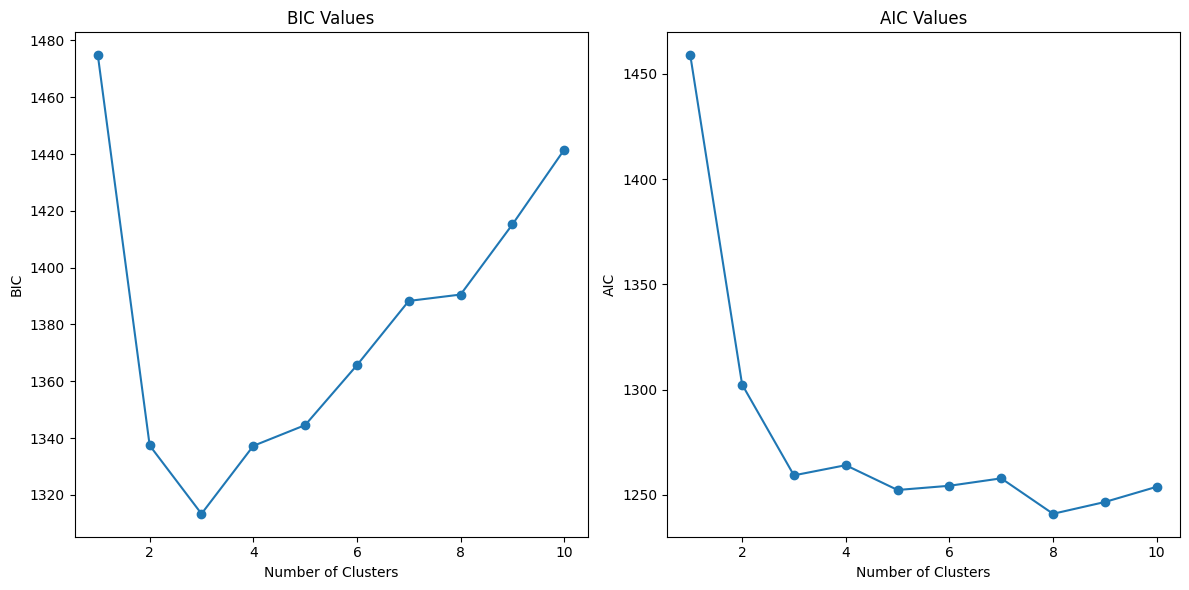

Optimal number of clusters based on AIC: 8
Optimal number of clusters based on BIC: 3


In [189]:
n_clusters_range = range(1, 11)
aic_values = []
bic_values = []

for n_clusters in n_clusters_range:
    aic, bic = calculate_aic_bic(X_pca, n_clusters)
    aic_values.append(aic)
    bic_values.append(bic)

# Plot AIC and BIC values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(n_clusters_range, bic_values, marker='o', linestyle='-')
plt.title('BIC Values')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC')

plt.subplot(1, 2, 2)
plt.plot(n_clusters_range, aic_values, marker='o', linestyle='-')
plt.title('AIC Values')
plt.xlabel('Number of Clusters')
plt.ylabel('AIC')

plt.tight_layout()
plt.show()

# Find the optimal number of clusters based on AIC and BIC
optimal_n_clusters_aic = n_clusters_range[np.argmin(aic_values)]
optimal_n_clusters_bic = n_clusters_range[np.argmin(bic_values)]

print(f"Optimal number of clusters based on AIC: {optimal_n_clusters_aic}")
print(f"Optimal number of clusters based on BIC: {optimal_n_clusters_bic}")

In [190]:
gmm_silhouette_score = silhouette_score(X_scaled, gmm_labels)
kmeans_silhouette_score = silhouette_score(X_scaled, kmeans_labels)

print(f"Silhouette Score for GMM: {gmm_silhouette_score}")
print(f"Silhouette Score for K-Means: {kmeans_silhouette_score}")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='viridis', s=50)
plt.title(f'GMM Clustering (Silhouette Score: {gmm_silhouette_score:.2f})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title(f'K-Means Clustering (Silhouette Score: {kmeans_silhouette_score:.2f})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()



NameError: name 'gmm_labels' is not defined